In [1]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

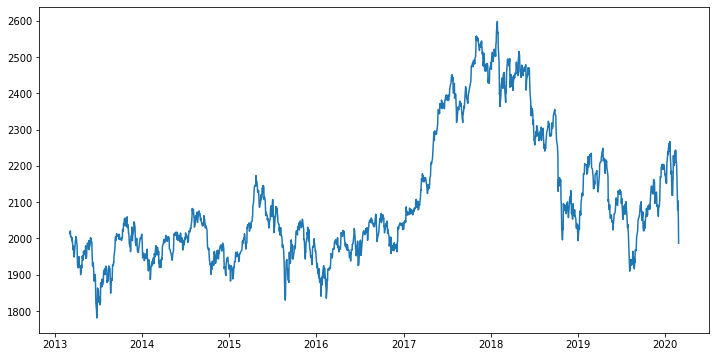

In [2]:
# kospi_df 만들고 시각화 해보기(2013~2020)
Kospi_df = fdr.DataReader('KS11', '2013-03-01', '2020-02-29')
plt.figure(figsize=(12,6), facecolor='w')
plt.plot(Kospi_df['Close'])
Kospi_c = Kospi_df['Close']
Kospi_df_c = pd.DataFrame(Kospi_c)

In [3]:
# 비교군 데이터 생성 및 확인
Kospi_df_last10day = fdr.DataReader('KS11', '2020-02-24', '2020-03-7')
Kospi_last10day_c =  Kospi_df_last10day['Close']
Kospi_df_last10day_c = pd.DataFrame(Kospi_last10day_c)
Kospi_df_last10day_c

,Close
Date,
2020-02-24,2079.04
2020-02-25,2103.61
2020-02-26,2076.77
2020-02-27,2054.89
2020-02-28,1987.01
2020-03-02,2002.51
2020-03-03,2014.15
2020-03-04,2059.33
2020-03-05,2085.26


In [4]:
# ARIMA Model 적용 (p,i,q)=(2,0,0)
model = ARIMA(Kospi_df_c,order = (2,0,0))
model_fit = model.fit()
forecast_data = model_fit.forecast(steps=5) # 마지막 5일의 예측 데이터 

In [5]:
# Arima 모델을 이용해 예측한 값과 실제 값 비교해보기
Kospi_df_last10day_c['Pred'] = Kospi_df_last10day_c['Close']
Kospi_df_last10day_c['Pred'][5:] = forecast_data.round(2)
Kospi_df_last10day_c

,Close,Pred
Date,,
2020-02-24,2079.04,2079.04
2020-02-25,2103.61,2103.61
2020-02-26,2076.77,2076.77
2020-02-27,2054.89,2054.89
2020-02-28,1987.01,1987.01
2020-03-02,2002.51,1985.43
2020-03-03,2014.15,1985.94
2020-03-04,2059.33,1986.51
2020-03-05,2085.26,1987.08


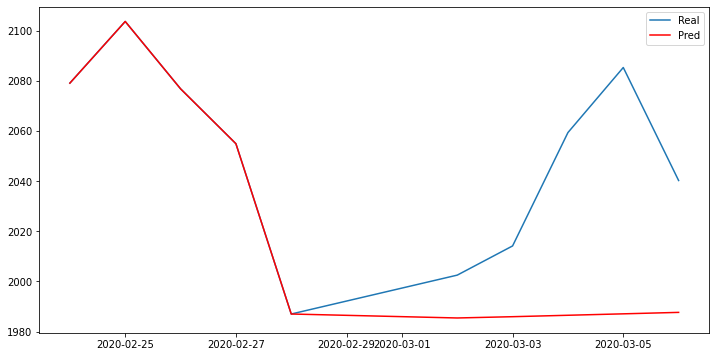

In [6]:
# 실제값과 예측값 그래프 비교
plt.figure(figsize=(12,6), facecolor='w')
plt.plot(Kospi_df_last10day_c['Close'], label = 'Real')
plt.plot(Kospi_df_last10day_c['Pred'], color = 'r', label = 'Pred')
plt.legend()